# Breast Cancer Prediction 

![Breast Cancer](../../Assets/breast_cancer.png)

By ``Abhijeet Srivastav``

**Connect with me**
- [LinkedIn](https://www.linkedin.com/in/abhijeet-srivastav-02245a18b/)
- [Github](https://github.com/AbhijeetSrivastav/Data-Science-Guide)
- [Social](https://www.instagram.com/abhijeet.codes/)

**AIM-** Predicting whether person is having breast cancer or not.

**Dataset Information**

- Historical medical  data sourced from Kaggle
- This dataset has 569 rows and 32 columns
- Dataset [Source](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)

**Attribute Information**
1. id: Unique Id
2. diagnosis: Two classes (M: Malignant, B: Benign)
3. radius_mean: Radius of Lobes
4. texture_mean: Mean of surface texture
5. perimeter_mean: Outer perimeter of lobes
6. area_mean: Mean area of lobes
7. smoothness_mean: Mean of smoothness levels
8. compactness_mean: Mean of compactness
9. concavity_mean: Mean of concavity
10. concave points_mean: Mean of concave points
11. symmetry_mean: Mean of symmetry
12. fractal_dimension_mean: Mean of fractal dimension
13. radius_se: SE of radius
14. texture_se: SE of texture
15. perimeter_se: Perimeter of SE
16. area_se: Area of SE
17. smoothness_se: SE of smoothness
18. compactness_se: SE of compactness
19. concavity_se: SE of concavity
20. concave_points_se: SE of concave points
21. symmetry_se: SE of symmetry
22. fractal_dimension_se: SE of fractal dimension
23. radius_worst: Worst radius
24. texture_worst: Worst Texture
25. perimeter_worst: Worst perimeter
26. area_worst: Worst area
27. smoothness_worst: Worst smoothness
28. compactness_worst: Worst compactness
29. concavity_worst: Worst concavity
30. concave points_worst: Worst concave points
31. symmetry_worst: Worst symmetry
32. fractal_dimension_worst: Worst fractal dimension

**Target  feature**
- Our target feature is diagnosis with two  classes (M: Malignant, B: Benign)

## 0. Required Imports

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Data Collection

In [3]:
df = pd.read_csv('../../Dataset/breast-cancer.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2. Data Preprocessing - First Pass

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 2.1. Checking for null values

<AxesSubplot:>

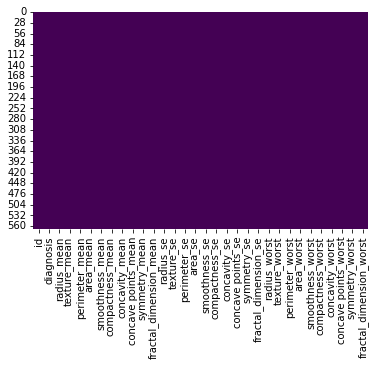

In [10]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [11]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

**Observation:** Their are no null values

### 2.2. Checking for NA values

<AxesSubplot:>

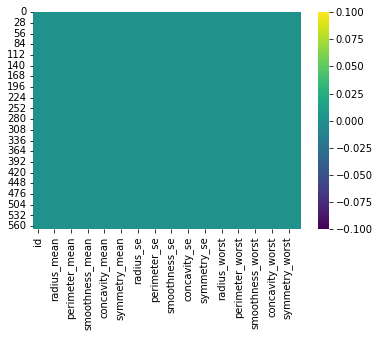

In [14]:
sns.heatmap(df.isna(), cbar=True, cmap='viridis')

In [12]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

**Observation:** Their are no NA values

### 2.3. Checking the data type of features

In [16]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

**Observation:** 
- All the features are in appropriate form.
- We will need to do Onehot encoding of target feature diagnosis.

### 2.4. Drop irrelevant columns

In [22]:
df.drop('id', inplace=True, axis=1)

## 3. Exploratory Data Analysis

### 3.1. Detecting outliers using Boxplot

In [23]:
num_features =[feature for feature in df.columns if df[feature].dtype !='O']

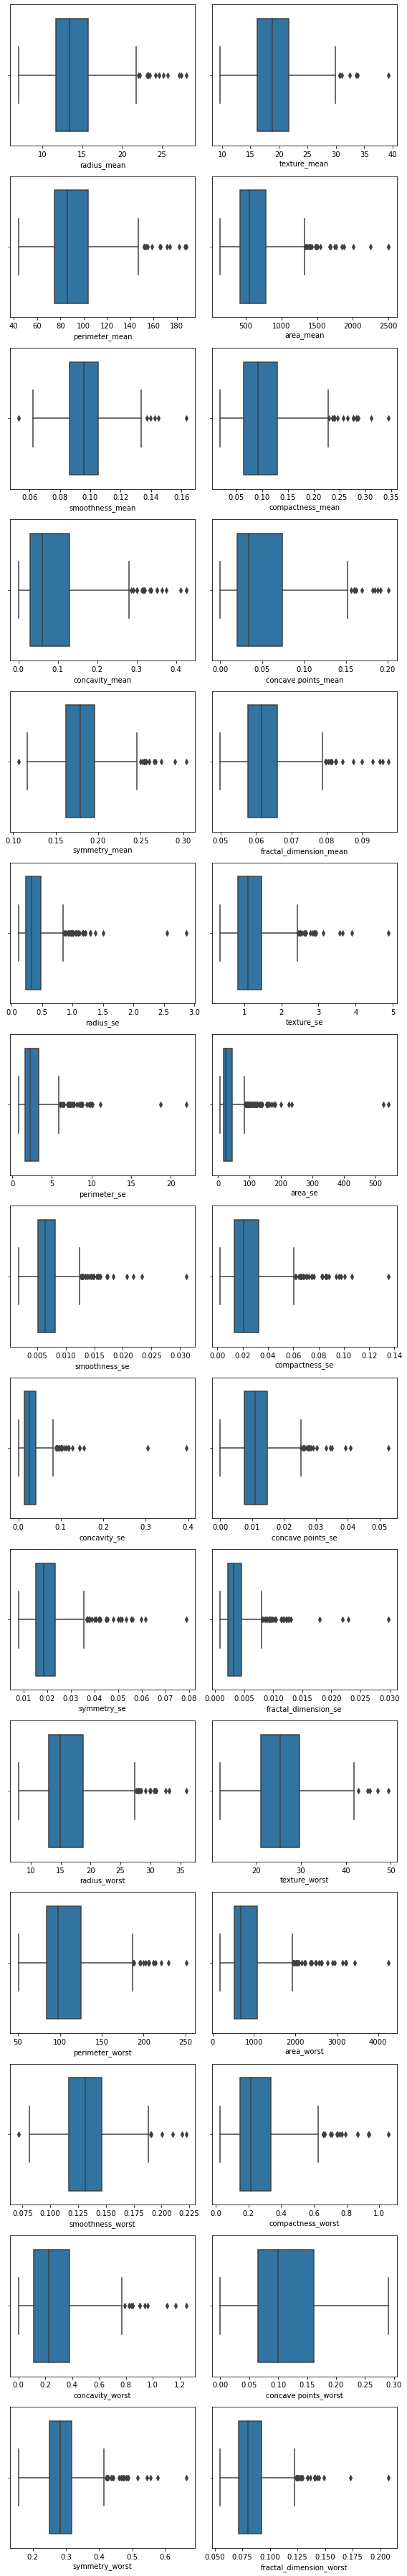

In [32]:
n = 1
plt.figure(figsize=(8, 50))
for feature in num_features:
    plt.subplot(15, 2, n)
    n += 1
    sns.boxplot(df[feature])
    plt.tight_layout()

**Observation:** Outliers detected in visual inspection.

### 3.2. Detecting outliers by z-score

In [33]:
z_scores = []
for feature in num_features:
    z_scores.append(np.abs(stats.zscore(df[feature])))

In [34]:
threshold = 0.3
for z in z_scores:
    print(np.where(z > threshold))

(array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,
        17,  18,  21,  22,  23,  24,  25,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  37,  41,  42,  45,  46,  48,  50,  52,  53,  55,
        56,  58,  59,  60,  61,  63,  64,  66,  67,  68,  69,  70,  71,
        72,  74,  75,  77,  78,  79,  80,  82,  83,  84,  85,  87,  88,
        91,  95,  96,  97,  98, 101, 102, 103, 104, 106, 107, 108, 109,
       110, 111, 113, 114, 115, 116, 118, 119, 120, 121, 122, 127, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143,
       144, 145, 146, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 166, 167, 168, 170, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       191, 192, 193, 195, 197, 198, 200, 201, 202, 204, 206, 207, 209,
       210, 211, 212, 213, 216, 217, 218, 219, 222, 223, 226, 228, 229,
       230, 231, 232, 233, 234, 236, 237, 239, 241, 242, 244, 2

**Observations**
- Except concave points_worst every other feature has some outliers.
- Logistic Regression is robust to outliers due to use of sigmoid log function but still we will be treating the outliers.

### 3.3. Correlation of features

In [35]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

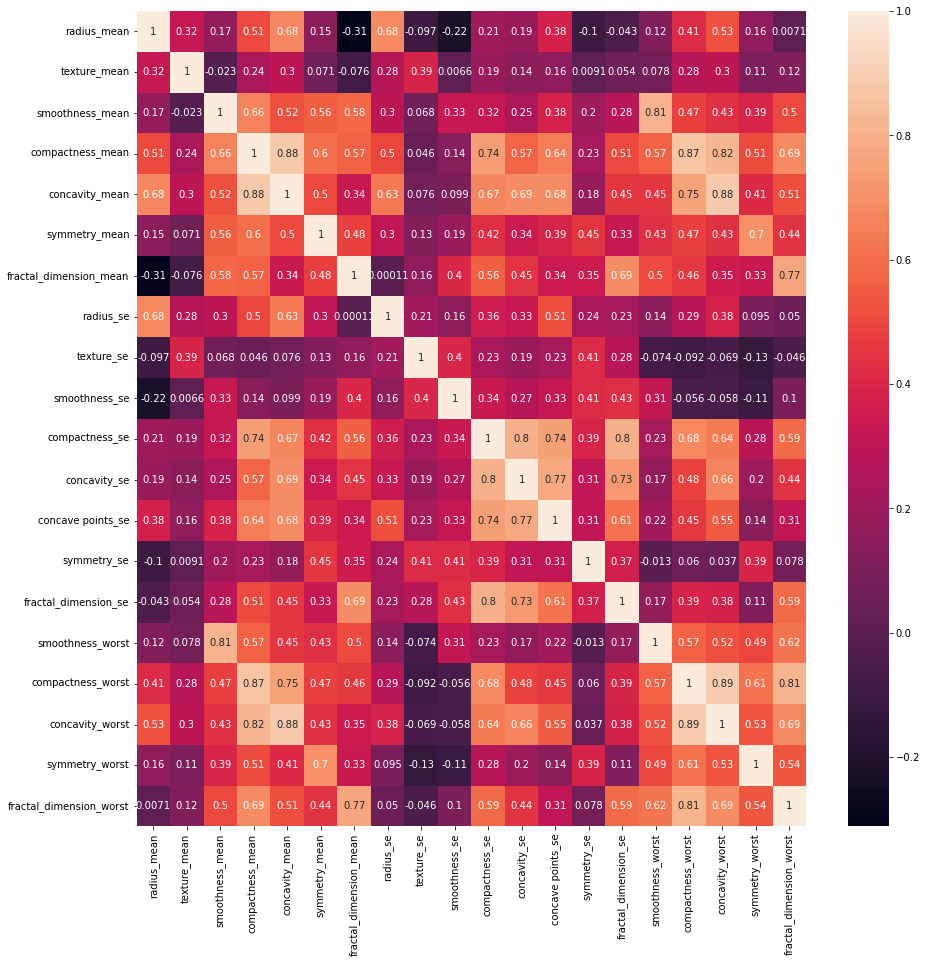

In [54]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

**Observations:**
- Highly Correlated features (>0.9)
    - radius mean & radius worst
    - radius mean & perimeter worst
    - radius mean & area worst
    - radius mean & perimeter mean
    - radius mean & area mean
    - texture mean & texture worst
    - perimeter mean & area mean
    - perimeter mean & radius worst
    - perimeter mean & perimeter worst
    - perimeter mean & area worst
    - area mean & radius worst
    - area mean & perimeter worst
    - area mean & area worst
    - concavity mean & concave points_mean
    - concave mean & concave points_worst
    - radius_se & perimeter_se
    - radius_se & area_se
    - perimeter_se & area_se
- These highly correlated features need to be removed.

## 4. Data Preprocessing - Second Pass

### 4.1. Treating Multicollinearity

In [44]:
correlated_features = set()
correlation_matrix = df.corr()

In [47]:
for i in range(len(correlation_matrix.columns)): # for columns
    for j in range(i): # for rows of each column
        if abs(correlation_matrix.iloc[i, j] > 0.9):
            col_name = correlation_matrix.columns[i]
            correlated_features.add(col_name)

Our correlated features are:

In [51]:
print(correlated_features)

{'perimeter_mean', 'area_worst', 'area_se', 'texture_worst', 'radius_worst', 'area_mean', 'perimeter_worst', 'concave points_mean', 'concave points_worst', 'perimeter_se'}


Dropping the correalted features

In [52]:
df.drop(correlated_features, inplace=True, axis=1)

### 4.2. Treating Outliers Using IQR

In [61]:
from scipy.stats import iqr

In [66]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = df.apply(iqr)

In [67]:
lower_fence = df < (Q1 - 1.5* IQR)
higher_fence = df > (Q3 + 1.5 * IQR)

In [68]:
filter = ~(lower_fence | higher_fence).any(axis=1)  # ~ is reverse operator and will select row between the fences

In [69]:
df = df[filter]

In [73]:
df.shape # new shape

(426, 21)

### 4.3. Encoding Target feature

In [56]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) # encode M as 1 and B as 0

## 5. Analytical Observations

### 5.1. How many cases of M and B are ?

<AxesSubplot:xlabel='diagnosis', ylabel='Count'>

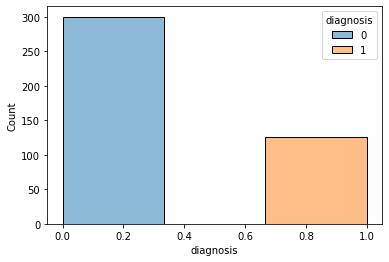

In [88]:
sns.histplot(df, x='diagnosis', hue='diagnosis', bins=3)

In [93]:
df['diagnosis'].value_counts()

0    300
1    126
Name: diagnosis, dtype: int64

**Observations:** 
- M is encoded as 1 and B as 0
- Cases of M is 300 
- Cases of B is 126 

### 5.2. Distribution of target  with input features

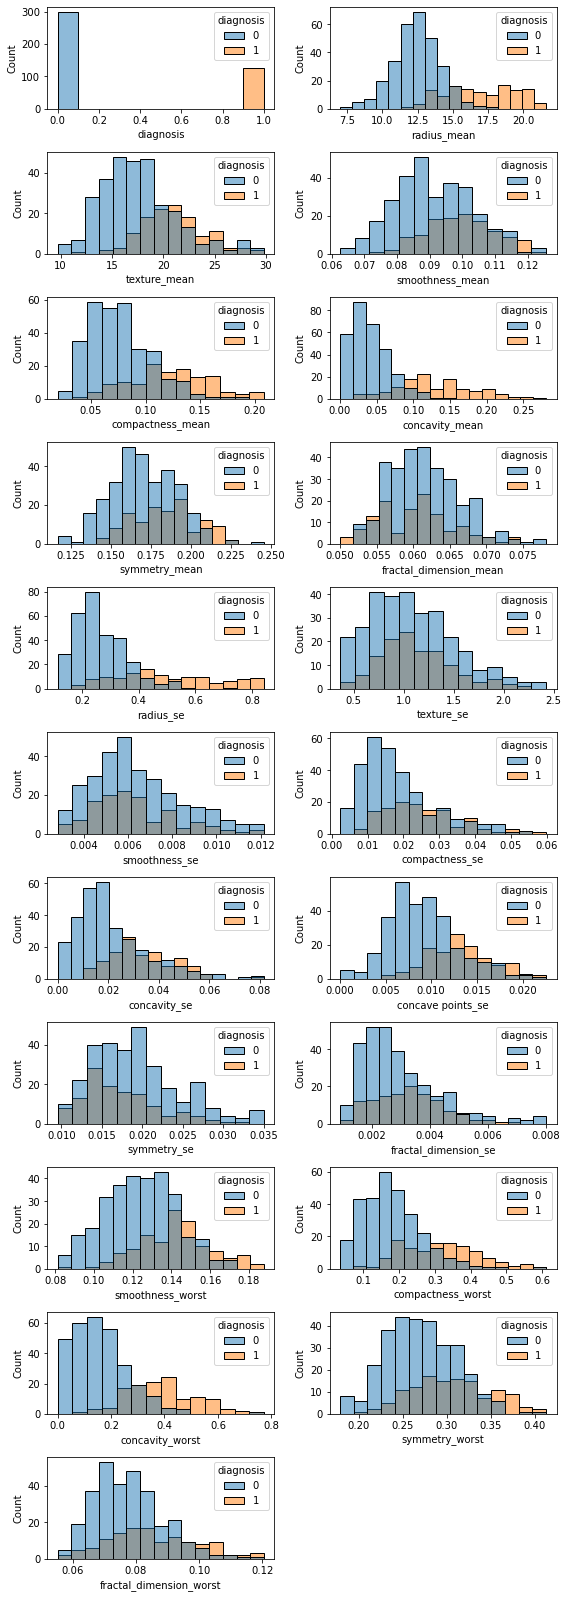

In [111]:
n = 1
plt.figure(figsize=(8,42))
for feature in df.columns:
    plt.subplot(21, 2, n)
    n += 1
    sns.histplot(df, x=feature, hue='diagnosis')
    plt.tight_layout()

**Observations:** Each feature is almost Normally distributed and overlapping.

## 6. Model Building

### 6.1. Feature Segregation

In [133]:
x = df[df.columns.drop('diagnosis')]
y = df['diagnosis']

### 6.2. Train Test Split

In [134]:
from sklearn.model_selection import train_test_split

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### 6.3. Feature Scaling

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler = StandardScaler()

In [152]:
x_train = scaler.fit_transform(x_train)

### 6.4. Logistic Regression Model

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
Logistic_classifier = LogisticRegression()

In [155]:
Logistic_classifier.fit(x_train, y_train)

LogisticRegression()

### 6.5. Hyperparameter Tunning

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
parameter= {
    'penalty': ['l1','l2','elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'],
    'C': np.logspace(-4, 4, 20),
    'max_iter' :[100, 1000,2500, 5000]
    }

In [168]:
Tunned_Logistic_Classifier = GridSearchCV(estimator=Logistic_classifier, param_grid=parameter, cv=3, verbose=True)

In [170]:
Tunned_Logistic_Classifier.fit(x_train, y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [171]:
Tunned_Logistic_Classifier.best_params_

{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [172]:
Tunned_Logistic_Classifier.best_score_

0.9698653198653199

### 6.6. Performance metrics

In [201]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from pretty_confusion_matrix import pp_matrix_from_data

#### 6.6.1. Metrics of Logistic Classifier

In [181]:
y_pred_LC = Logistic_classifier.predict(scaler.transform(x_test))

In [182]:
accuracy_score(y_pred_LC, y_test)

0.96875

<AxesSubplot:>

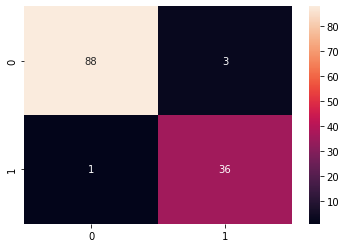

In [214]:
sns.heatmap(confusion_matrix(y_pred_LC, y_test), annot=True)

In [183]:
print(classification_report(y_pred_LC, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        91
           1       0.92      0.97      0.95        37

    accuracy                           0.97       128
   macro avg       0.96      0.97      0.96       128
weighted avg       0.97      0.97      0.97       128



#### 6.6.2. Metrics of Tunned Logistic Classifier

In [187]:
y_pred_TLC = Tunned_Logistic_Classifier.predict(scaler.transform(x_test))

In [188]:
accuracy_score(y_pred_TLC, y_test)

0.953125

In [189]:
print(classification_report(y_pred_TLC, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.92      0.92      0.92        39

    accuracy                           0.95       128
   macro avg       0.94      0.94      0.94       128
weighted avg       0.95      0.95      0.95       128



<AxesSubplot:>

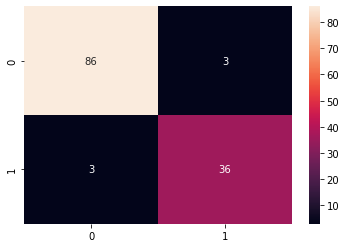

In [215]:
sns.heatmap(confusion_matrix(y_pred_TLC, y_test), annot=True)

## 7. Pickling

In [216]:
import pickle

In [217]:
LC = pickle.dump(Logistic_classifier, open('lc_model.sav', 'wb'))

In [218]:
TLC = pickle.dump(Tunned_Logistic_Classifier, open('Tlc_model.sav', 'wb'))